In [282]:
import json

with open('./Downloads/json.txt') as json_file:
    data = json.load(json_file)['data']
    

with open('./Downloads/persons.txt') as json_file:
    persons = json.load(json_file)['data']['persons']

In [287]:
import pandas as pd

data = pd.DataFrame(data['locations'])
data.head()

,constructionDate,coordinateX,coordinateY,demolitionDate,description,id,mainPhotoLink,name,photoLinks,wikiLink
0,1842,59.945277,30.292889,,{'ru': 'В этом доме проживали: Чайковский Петр...,5d83443e0cb433003f223be6,https://drive.google.com/uc?export=view&id=1XV...,{'ru': 'Доходный дом купцов Елисеевых'},https://drive.google.com/uc?export=view&id=1qT...,http://www.citywalls.ru/house374.html
1,1910,59.954917,30.293707,,{'ru': 'Когда в начале 1910-х годов участок по...,5d83443e0cb433003f223be7,,"{'ru': 'Доходный дом Н. Я. и Ф. Я. Колобовых, ...",,http://www.citywalls.ru/house999.html
2,1835,59.927491,30.330852,,{'ru': 'одно из наиболее престижных высших уче...,5d83443e0cb433003f223be8,,{'ru': 'Училище правоведения'},,https://ru.wikipedia.org/wiki/%D0%98%D0%BC%D0%...
3,,59.945617,30.341084,,"{'ru': 'Л. М. Конисская в книге ""Чайковский в ...",5d83443e0cb433003f223be9,https://drive.google.com/uc?export=view&id=1H0...,{'ru': 'дом Лещевой'},https://drive.google.com/uc?export=view&id=1Qf...,http://www.citywalls.ru/house7260.html
4,1799,59.945319,30.287032,,{'ru': 'С 1840-х гг. участок с домами Средний ...,5d83443e0cb433003f223bea,https://drive.google.com/uc?export=view&id=12g...,{'ru': 'дом Остерлова'},https://drive.google.com/uc?export=view&id=1Xa...,http://www.citywalls.ru/house7445.html


In [6]:
data_persons = pd.DataFrame(persons)
data_persons.head()

,birthDate,deathDate,description,firstName,id,lastName,profession,pseudonym,relations
0,1778,1829,{'ru': 'Исаак Михайлович закончил Петербургску...,{'ru': 'Исаак'},5d83443c0cb433003f223ae5,{'ru': 'Аблец'},{'ru': 'балетмейстер'},{'ru': None},[{'location': {'id': '5d83443e0cb433003f223c06...
1,05.04.1937,,"{'ru': 'Нина Андреевна, советская певица (сопр...",{'ru': 'Нина'},5d83443c0cb433003f223ae6,{'ru': 'Авдошина-Володарская'},{'ru': 'оперная певица (лирико-драматическое с...,{'ru': None},[]
2,,,{'ru': 'В 1911 году выступал в передвижном опе...,{'ru': 'Давид'},5d83443c0cb433003f223ae7,{'ru': 'Аграновский'},{'ru': 'оперный певец (тенор)'},{'ru': None},[]
3,1853,1916,{'ru': ' Николай танцевал в Мариинском театре ...,{'ru': 'Николай'},5d83443c0cb433003f223ae8,{'ru': 'Аистов'},{'ru': 'балетмейстер'},{'ru': None},[]
4,27.04.1887,19.01.1972,{'ru': 'Софья Владимировна из рода армянских д...,{'ru': 'Софья'},5d83443c0cb433003f223ae9,{'ru': 'Акимова'},"{'ru': 'оперная и камерная певица, педагог'}",{'ru': None},[]


In [7]:
data.name = data.name.apply(lambda x: x['ru'])
data.description = data.description.apply(lambda x: x['ru'])

data_persons.firstName = data_persons.firstName.apply(lambda x: x['ru'])
data_persons.description = data_persons.description.apply(lambda x: x['ru'])
data_persons.lastName = data_persons.lastName.apply(lambda x: x['ru'])
data_persons.profession = data_persons.profession.apply(lambda x: x['ru'])
data_persons.pseudonym = data_persons.pseudonym.apply(lambda x: x['ru'])

In [8]:
data.description[1]

'Когда в начале 1910-х годов участок под № 18, как и соседний № 16, приобрели богатые купцы-лесопромышленники братья Н. Я. и Ф. Я. Колобовы, все старые постройки были снесены, а на их месте вырос пятиэтажный доходный дом, который мы видим сегодня.'

In [13]:
import numpy as np

indexes = np.where(data.wikiLink.apply(lambda x: len(x)) > 0)
data_try = data.iloc[indexes]
data_try['wikiLink_new'] = data_try.wikiLink.apply(lambda x: (x.split('/')))
new_indexes = np.where(data_try.wikiLink_new.apply(lambda x: len(x) > 2))
data_try = data_try.iloc[new_indexes]
data_try.head()

/Users/rav/.virtualenvs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,constructionDate,coordinateX,coordinateY,demolitionDate,description,id,mainPhotoLink,name,photoLinks,wikiLink,wikiLink_new
0,1842,59.945277,30.292889,,В этом доме проживали: Чайковский Петр Ильич (...,5d83443e0cb433003f223be6,https://drive.google.com/uc?export=view&id=1XV...,Доходный дом купцов Елисеевых,https://drive.google.com/uc?export=view&id=1qT...,http://www.citywalls.ru/house374.html,"[http:, , www.citywalls.ru, house374.html]"
1,1910,59.954917,30.293707,,"Когда в начале 1910-х годов участок под № 18, ...",5d83443e0cb433003f223be7,,"Доходный дом Н. Я. и Ф. Я. Колобовых, частный ...",,http://www.citywalls.ru/house999.html,"[http:, , www.citywalls.ru, house999.html]"
2,1835,59.927491,30.330852,,одно из наиболее престижных высших учебных зав...,5d83443e0cb433003f223be8,,Училище правоведения,,https://ru.wikipedia.org/wiki/%D0%98%D0%BC%D0%...,"[https:, , ru.wikipedia.org, wiki, %D0%98%D0%B..."
3,,59.945617,30.341084,,"Л. М. Конисская в книге ""Чайковский в Петербур...",5d83443e0cb433003f223be9,https://drive.google.com/uc?export=view&id=1H0...,дом Лещевой,https://drive.google.com/uc?export=view&id=1Qf...,http://www.citywalls.ru/house7260.html,"[http:, , www.citywalls.ru, house7260.html]"
4,1799,59.945319,30.287032,,С 1840-х гг. участок с домами Средний пр. 8 / ...,5d83443e0cb433003f223bea,https://drive.google.com/uc?export=view&id=12g...,дом Остерлова,https://drive.google.com/uc?export=view&id=1Xa...,http://www.citywalls.ru/house7445.html,"[http:, , www.citywalls.ru, house7445.html]"


In [14]:
pd.unique(data_try.wikiLink_new.apply(lambda x: x[2]))

array(['www.citywalls.ru', 'ru.wikipedia.org', 'walkspb.ru',
       'history.gradpetra.net', 'family-history.ru', 'www.krugosvet.ru',
       'ru.m.wikipedia.org', 'www.fiesta.city', 'en.wikipedia.org',
       'wikimapia.org', 'www.encspb.ru', 'sobory.ru', 'rutraveller.ru',
       'www.visit-petersburg.ru', 'spbarchives.ru', 'www.gmgs.ru',
       'adresaspb.ru', 'www.columbista.com', 'www.culture.ru',
       'www.rgo.ru', 'peterburg2.ru', 'www.peterburg.biz'], dtype=object)

In [15]:
len(pd.unique(data_try.wikiLink_new.apply(lambda x: x[2])))

22

In [80]:
morph.normal_forms('писательница')

['писательница']

In [79]:
is_loc_indexes = np.where(data_persons.relations.apply(lambda x: len(x)) != 0)
data_persons_w_locs = data_persons.iloc[is_loc_indexes]
texts_w_locs = profession['profession'].str.lower()
words_w_locs = [word for word in texts_w_locs if word.isalpha()]
words_w_locs = [morph.normal_forms(word)[0] for word in words_w_locs]
word_count = Counter(word_tokenize('\n'.join(words_w_locs)))

word_count.most_common()

[('архитектор', 117),
 ('художник', 102),
 ('композитор', 38),
 ('поэт', 31),
 ('писатель', 25),
 ('скульптор', 18),
 ('политик', 7),
 ('художница', 6),
 ('фотограф', 4),
 ('прозаик', 3),
 ('учёный', 3),
 ('живописец', 3),
 ('военачальник', 3),
 ('физик', 3),
 ('балетмейстер', 2),
 ('балерина', 2),
 ('актёр', 2),
 ('певица', 2),
 ('драматург', 2),
 ('поэтесса', 2),
 ('писательница', 2),
 ('графиня', 2),
 ('искусствовед', 2),
 ('декоратор', 2),
 ('благотворительность', 2),
 ('подпоручик', 2),
 ('историк', 2),
 ('актриса', 2),
 ('гобоист', 1),
 ('певец', 1),
 ('скрипач', 1),
 ('имам', 1),
 ('няня', 1),
 ('императрица', 1),
 ('драмматург', 1),
 ('публицист', 1),
 ('литературовед', 1),
 ('кинорежиссёр', 1),
 ('критик', 1),
 ('меценат', 1),
 ('ювелир', 1),
 ('музыкант', 1),
 ('офицер', 1),
 ('предприниматель', 1),
 ('коммерсант', 1),
 ('полковник', 1),
 ('литератор', 1),
 ('педагог', 1),
 ('юродивый', 1),
 ('генерал', 1),
 ('хореограф', 1),
 ('княгиня', 1),
 ('фрейлина', 1),
 ('автоспортсме

In [57]:
len(data_persons)

965

чел-профессия

In [81]:
words_w_locs

['балетмейстер',
 'балетмейстер',
 'композитор',
 'гобоист',
 'балерина',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'певец',
 'композитор',
 'композитор',
 'композитор',
 'актёр',
 'певица',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'драматург',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'скрипач',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'композитор',
 'актёр',
 'писатель',
 'поэтесса',
 'поэт',
 'поэт',
 'прозаик',
 'писатель',
 'писатель',
 'поэт',
 'драматург',
 'скульптор',
 'архитектор',
 'скульптор',
 'архитектор',
 'архитектор',
 'архитектор',
 'архитектор',
 'архитектор',
 'архитектор',
 'архитектор',
 'архитектор',
 'имам',
 'архитектор',
 'няня',
 'художник',
 'императрица',
 'архитектор',
 'поэт',
 'учёный',

In [19]:
pd.unique(data_persons.profession)

array(['балетмейстер', 'оперная певица (лирико-драматическое сопрано)',
       'оперный певец (тенор)', 'оперная и камерная певица, педагог',
       'композитор', 'оперный певец (бас) и педагог',
       'оперный певец (баритон) и педагог', 'педагог, дирижер', 'гобоист',
       'певец (бас-баритон), педагог',
       'оперная (меццо-сопрано) и концертная певица, вокальный педагог,',
       'балерина', 'композитор, дирижер',
       'оперная и камерная певица (контральто), педагог',
       'балетный композитор',
       'оперный артист (лирико-драматический тенор), педагог',
       'ком\xadпо\xadзи\xadтор, пиа\xadнист',
       'оперная певица (меццо-сопрано) и педагог',
       'оперный певец, режиссёр',
       'оперная певица (контральто), хоровой дирижёр, фольклористка, общественный деятель',
       'оперная певица (меццо-сопрано)',
       'оперный певец (бас-баритон, позже — драматический тенор), композитор и вокальный педагог',
       'певец', 'оперный певец (бас-баритон), педагог вокала

In [28]:
len(data_persons.profession)

965

In [37]:
profession = pd.DataFrame(data_persons.profession)
profession = profession.dropna()
profession.head()

,profession
0,балетмейстер
1,оперная певица (лирико-драматическое сопрано)
2,оперный певец (тенор)
3,балетмейстер
4,"оперная и камерная певица, педагог"


In [38]:
len(profession)

952

In [78]:
from collections import Counter
from string import punctuation

import pandas as pd

from nltk.corpus import stopwords
from nltk import word_tokenize

import pymorphy2

morph = pymorphy2.MorphAnalyzer()

stoplist = set(stopwords.words('english') + list(punctuation))

texts = profession['profession'].str.lower()
words = [word for word in texts if word.isalpha()]
words = [morph.normal_forms(word)[0] for word in words]
word_count = Counter(word_tokenize('\n'.join(words)))

word_count.most_common()

[('архитектор', 117),
 ('художник', 102),
 ('композитор', 38),
 ('поэт', 31),
 ('писатель', 25),
 ('скульптор', 18),
 ('политик', 7),
 ('художница', 6),
 ('фотограф', 4),
 ('прозаик', 3),
 ('учёный', 3),
 ('живописец', 3),
 ('военачальник', 3),
 ('физик', 3),
 ('балетмейстер', 2),
 ('балерина', 2),
 ('актёр', 2),
 ('певица', 2),
 ('драматург', 2),
 ('поэтесса', 2),
 ('писательница', 2),
 ('графиня', 2),
 ('искусствовед', 2),
 ('декоратор', 2),
 ('благотворительность', 2),
 ('подпоручик', 2),
 ('историк', 2),
 ('актриса', 2),
 ('гобоист', 1),
 ('певец', 1),
 ('скрипач', 1),
 ('имам', 1),
 ('няня', 1),
 ('императрица', 1),
 ('драмматург', 1),
 ('публицист', 1),
 ('литературовед', 1),
 ('кинорежиссёр', 1),
 ('критик', 1),
 ('меценат', 1),
 ('ювелир', 1),
 ('музыкант', 1),
 ('офицер', 1),
 ('предприниматель', 1),
 ('коммерсант', 1),
 ('полковник', 1),
 ('литератор', 1),
 ('педагог', 1),
 ('юродивый', 1),
 ('генерал', 1),
 ('хореограф', 1),
 ('княгиня', 1),
 ('фрейлина', 1),
 ('автоспортсме

In [ ]:
'плотничный', 'юродивый'

взять ток те, где есть локации

In [83]:


'автоспортсмен' in set(words)
[i for i in x.split(' ') if (x is not None) and (

True

In [106]:
from collections import Counter
from string import punctuation

import pandas as pd

from nltk.corpus import stopwords
from nltk import word_tokenize

import pymorphy2

morph = pymorphy2.MorphAnalyzer()

stoplist = set(stopwords.words('english') + list(punctuation))

texts = profession['profession'].str.lower()
words = [word for word in texts if word.isalpha()]
words = [morph.normal_forms(word)[0] for word in words]
word_count = Counter(word_tokenize('\n'.join(words)))

word_count.most_common()

data_persons['professionClean'] =  data_persons.profession.apply(lambda x:
                                                                  [i for i in x.split(' ') if i in set(words)]
                                                                  if x is not None else [])

data_persons['professionClean'] = data_persons.profession_clean.apply(lambda x: x[0] if x else None)

In [117]:
data_persons.profession.apply(lambda x:([i for i in x.split(' ') if i in set(words)])[0]
                                                                  if x is not None else [])

IndexError: list index out of range

In [111]:
data_persons.profession_clean[0][0]

'балетмейстер'

In [113]:
data_persons

,birthDate,deathDate,description,firstName,id,lastName,profession,pseudonym,relations,profession_clean,professionClean
0,1778,1829,Исаак Михайлович закончил Петербургскую театра...,Исаак,5d83443c0cb433003f223ae5,Аблец,балетмейстер,None,[{'location': {'id': '5d83443e0cb433003f223c06...,[балетмейстер],[балетмейстер]
1,05.04.1937,,"Нина Андреевна, советская певица (сопрано). \n...",Нина,5d83443c0cb433003f223ae6,Авдошина-Володарская,оперная певица (лирико-драматическое сопрано),None,[],[певица],[певица]
2,,,В 1911 году выступал в передвижном оперном кол...,Давид,5d83443c0cb433003f223ae7,Аграновский,оперный певец (тенор),None,[],[певец],[певец]
3,1853,1916,\nНиколай танцевал в Мариинском театре с 1882-...,Николай,5d83443c0cb433003f223ae8,Аистов,балетмейстер,None,[],[балетмейстер],[балетмейстер]
4,27.04.1887,19.01.1972,Софья Владимировна из рода армянских дворян. Е...,Софья,5d83443c0cb433003f223ae9,Акимова,"оперная и камерная певица, педагог",None,[],[педагог],[педагог]
5,,,С 1908 по 1918 год он работал инструктором-вос...,Леонид,5d83443c0cb433003f223aea,Александров,композитор,None,[],[композитор],[композитор]
6,,,С 1908 по 1918 год он работал инструктором-вос...,Сергей,5d83443c0cb433003f223aeb,Алексашкин,оперный певец (бас) и педагог,None,[],"[певец, педагог]","[певец, педагог]"
7,,,Иван Павлович Алексеев родился 9 октября 1913 ...,Иван,5d83443c0cb433003f223aec,Алексеев,оперный певец (баритон) и педагог,None,[],"[певец, педагог]","[певец, педагог]"
8,,,А. Дмитриева. Дирижёрский дебют музыканта с Ак...,Владимир,5d83443c0cb433003f223aed,Альтшулер,"педагог, дирижер",None,[],[],[]
9,,,В 1902 году Георгий Амосов окончил училище При...,Георгий,5d83443c0cb433003f223aee,Амосов,гобоист,None,[],[гобоист],[гобоист]


In [121]:
data_persons['professionClean'] = data_persons.profession_clean.apply(lambda x: x[0] if x else None)

In [122]:
data_persons

,birthDate,deathDate,description,firstName,id,lastName,profession,pseudonym,relations,profession_clean,professionClean
0,1778,1829,Исаак Михайлович закончил Петербургскую театра...,Исаак,5d83443c0cb433003f223ae5,Аблец,балетмейстер,None,[{'location': {'id': '5d83443e0cb433003f223c06...,[балетмейстер],балетмейстер
1,05.04.1937,,"Нина Андреевна, советская певица (сопрано). \n...",Нина,5d83443c0cb433003f223ae6,Авдошина-Володарская,оперная певица (лирико-драматическое сопрано),None,[],[певица],певица
2,,,В 1911 году выступал в передвижном оперном кол...,Давид,5d83443c0cb433003f223ae7,Аграновский,оперный певец (тенор),None,[],[певец],певец
3,1853,1916,\nНиколай танцевал в Мариинском театре с 1882-...,Николай,5d83443c0cb433003f223ae8,Аистов,балетмейстер,None,[],[балетмейстер],балетмейстер
4,27.04.1887,19.01.1972,Софья Владимировна из рода армянских дворян. Е...,Софья,5d83443c0cb433003f223ae9,Акимова,"оперная и камерная певица, педагог",None,[],[педагог],педагог
5,,,С 1908 по 1918 год он работал инструктором-вос...,Леонид,5d83443c0cb433003f223aea,Александров,композитор,None,[],[композитор],композитор
6,,,С 1908 по 1918 год он работал инструктором-вос...,Сергей,5d83443c0cb433003f223aeb,Алексашкин,оперный певец (бас) и педагог,None,[],"[певец, педагог]",певец
7,,,Иван Павлович Алексеев родился 9 октября 1913 ...,Иван,5d83443c0cb433003f223aec,Алексеев,оперный певец (баритон) и педагог,None,[],"[певец, педагог]",певец
8,,,А. Дмитриева. Дирижёрский дебют музыканта с Ак...,Владимир,5d83443c0cb433003f223aed,Альтшулер,"педагог, дирижер",None,[],[],None
9,,,В 1902 году Георгий Амосов окончил училище При...,Георгий,5d83443c0cb433003f223aee,Амосов,гобоист,None,[],[гобоист],гобоист


In [125]:
data_persons_professions = data_persons[['id', 'firstName', 'lastName', 'professionClean']]
pd.DataFrame.to_csv(data_persons_professions, './Downloads/data_persons_professions.csv')

In [272]:
df = pd.read_csv('./Downloads/data_persons_professions.csv')
df

,Unnamed: 0,id,firstName,lastName,professionClean
0,0,5d83443c0cb433003f223ae5,Исаак,Аблец,балетмейстер
1,1,5d83443c0cb433003f223ae6,Нина,Авдошина-Володарская,певица
2,2,5d83443c0cb433003f223ae7,Давид,Аграновский,певец
3,3,5d83443c0cb433003f223ae8,Николай,Аистов,балетмейстер
4,4,5d83443c0cb433003f223ae9,Софья,Акимова,педагог
5,5,5d83443c0cb433003f223aea,Леонид,Александров,композитор
6,6,5d83443c0cb433003f223aeb,Сергей,Алексашкин,певец
7,7,5d83443c0cb433003f223aec,Иван,Алексеев,певец
8,8,5d83443c0cb433003f223aed,Владимир,Альтшулер,NaN
9,9,5d83443c0cb433003f223aee,Георгий,Амосов,гобоист


In [148]:
q = df[df.professionClean == 'певица'].professionClean.apply(lambda x: 'певец')
df.loc[q.index, 'professionClean'] = q

In [149]:
df

,Unnamed: 0,id,firstName,lastName,professionClean
0,0,5d83443c0cb433003f223ae5,Исаак,Аблец,балетмейстер
1,1,5d83443c0cb433003f223ae6,Нина,Авдошина-Володарская,певец
2,2,5d83443c0cb433003f223ae7,Давид,Аграновский,певец
3,3,5d83443c0cb433003f223ae8,Николай,Аистов,балетмейстер
4,4,5d83443c0cb433003f223ae9,Софья,Акимова,педагог
5,5,5d83443c0cb433003f223aea,Леонид,Александров,композитор
6,6,5d83443c0cb433003f223aeb,Сергей,Алексашкин,певец
7,7,5d83443c0cb433003f223aec,Иван,Алексеев,певец
8,8,5d83443c0cb433003f223aed,Владимир,Альтшулер,NaN
9,9,5d83443c0cb433003f223aee,Георгий,Амосов,гобоист


In [151]:
df.professionClean.value_counts()

архитектор             116
художник               102
певец                   57
композитор              46
писатель                29
скульптор               17
поэт                    15
педагог                 13
генерал                 11
академик                 9
художница                7
драматург                7
фотограф                 5
физик                    5
военачальник             5
историк                  5
дирижёр                  4
императрица              4
балетмейстер             4
прозаик                  4
актриса                  4
литератор                4
музыкант                 3
писательница             3
живописец                3
поэтесса                 3
искусствовед             3
публицист                3
меценат                  3
графиня                  2
                      ... 
балерина                 2
подпоручик               2
хореограф                2
декоратор                2
благотворительность      2
полковник                2
р

In [ ]:
b = ['художественные деятели',
'музыка',
'танцы',
'литература',
'актеры',
'общественные деятели',
'наука',
'военные деятели',
'предпринимательство'
]

In [ ]:
d = {'архитектура': 'художественные деятели',
 'певцы': 'музыка',
'художники': 'художественные деятели',
'композиторы': 'музыка' ,
'танцы': 'танцы',
'литература': 'литература',
'музыка': 'музыка',
'актеры': 'актеры',
'общественные деятели': 'общественные деятели',
'религия': 'общественные деятели',
'наука': 'наука',
'военные деятели': 'военные деятели',
'предпринимательство': 'предпринимательство',
'спорт': 'танцы',
'плотничный': 'предпринимательство',
'благотворительность': 'предпринимательство'
    }


In [273]:
a = [['архитектор', 'скульптор', 'декоратор', 'художник', 'художница', 'фотограф', 'живописец', 'ювелир'],
['певец', 'певица', 'композитор', 'гобоист', 'дирижёр', 'скрипач', 'музыкант'],
['балетмейстер', 'балерина', 'хореограф', 'автоспортсмен'],
['драматург', 'писатель', 'поэтесса', 'поэт', 'прозаик', 'литератор', 'писательница', 'публицист', 'редактор', 'драмматург', 'литературовед', 'критик'],
['актриса', 'актёр'],
['императрица', 'графиня', 'политик', 'княгиня', 'фрейлина', 'имам', 'священник'],
['педагог', 'искусствовед', 'историк', 'академик', 'физик', 'нейрофизиолог', 'лингвист', 'космонавт', 'математик', 'учёный','филолог', 'шахматист'],
['генерал', 'военачальник', 'офицер', 'полковник', 'подпоручик'],
['меценат', 'предприниматель', 'коммерсант', 'плотничный', 'благотворительность']
]

b = ['художественные деятели',
'музыка',
'танцы',
'литература',
'актеры',
'общественные деятели',
'наука',
'военные деятели',
'предпринимательство'
]

list(zip(a, b))

q = {}
for x, y in zip(a, b):
    for xx in x:
        q.update({xx: y})
        
df.professionClean = df.professionClean.replace(q)

#
#


In [274]:
len(a), len(b)

(9, 9)

In [275]:
list(zip(a, b))

[(['архитектор',
   'скульптор',
   'декоратор',
   'художник',
   'художница',
   'фотограф',
   'живописец',
   'ювелир'],
  'художественные деятели'),
 (['певец',
   'певица',
   'композитор',
   'гобоист',
   'дирижёр',
   'скрипач',
   'музыкант'],
  'музыка'),
 (['балетмейстер', 'балерина', 'хореограф', 'автоспортсмен'], 'танцы'),
 (['драматург',
   'писатель',
   'поэтесса',
   'поэт',
   'прозаик',
   'литератор',
   'писательница',
   'публицист',
   'редактор',
   'драмматург',
   'литературовед',
   'критик'],
  'литература'),
 (['актриса', 'актёр'], 'актеры'),
 (['императрица',
   'графиня',
   'политик',
   'княгиня',
   'фрейлина',
   'имам',
   'священник'],
  'общественные деятели'),
 (['педагог',
   'искусствовед',
   'историк',
   'академик',
   'физик',
   'нейрофизиолог',
   'лингвист',
   'космонавт',
   'математик',
   'учёный',
   'филолог',
   'шахматист'],
  'наука'),
 (['генерал', 'военачальник', 'офицер', 'полковник', 'подпоручик'],
  'военные деятели'),
 (['

In [276]:
q = {}
for x, y in zip(a, b):
    for xx in x:
        q.update({xx: y})

In [277]:
df.professionClean = df.professionClean.replace(q)

In [278]:
df[df.professionClean == 'благотворительность']

,Unnamed: 0,id,firstName,lastName,professionClean


In [279]:
df

,Unnamed: 0,id,firstName,lastName,professionClean
0,0,5d83443c0cb433003f223ae5,Исаак,Аблец,танцы
1,1,5d83443c0cb433003f223ae6,Нина,Авдошина-Володарская,музыка
2,2,5d83443c0cb433003f223ae7,Давид,Аграновский,музыка
3,3,5d83443c0cb433003f223ae8,Николай,Аистов,танцы
4,4,5d83443c0cb433003f223ae9,Софья,Акимова,наука
5,5,5d83443c0cb433003f223aea,Леонид,Александров,музыка
6,6,5d83443c0cb433003f223aeb,Сергей,Алексашкин,музыка
7,7,5d83443c0cb433003f223aec,Иван,Алексеев,музыка
8,8,5d83443c0cb433003f223aed,Владимир,Альтшулер,NaN
9,9,5d83443c0cb433003f223aee,Георгий,Амосов,музыка


In [166]:
q

{'архитектор': 'архитектура',
 'скульптор': 'архитектура',
 'декоратор': 'архитектура',
 'певец': 'певцы',
 'певица': 'певцы',
 'художник': 'художники',
 'художница': 'художники',
 'фотограф': 'художники',
 'живописец': 'художники',
 'ювелир': 'художники',
 'композитор': 'композиторы',
 'балетмейстер': 'танцы',
 'балерина': 'танцы',
 'хореограф': 'танцы',
 'драматург': 'литература',
 'писатель': 'литература',
 'поэтесса': 'литература',
 'поэт': 'литература',
 'прозаик': 'литература',
 'литератор': 'литература',
 'писательница': 'литература',
 'публицист': 'литература',
 'редактор': 'литература',
 'драмматург': 'литература',
 'литературовед': 'литература',
 'критик': 'литература',
 'гобоист': 'музыка',
 'дирижёр': 'музыка',
 'скрипач': 'музыка',
 'музыкант': 'музыка',
 'актриса': 'актеры',
 'актёр': 'актеры',
 'императрица': 'общественные деятели',
 'графиня': 'общественные деятели',
 'политик': 'общественные деятели',
 'княгиня': 'общественные деятели',
 'фрейлина': 'общественные деяте

In [281]:
pd.DataFrame.to_csv(df, './Downloads/data_persons_professions_v4.csv')

In [179]:
df['full_name'] = df['lastName'] + ' ' + df['firstName']

In [180]:
df1 = df.drop_duplicates(subset=['full_name'])
df1.shape

(919, 6)

In [75]:
words1[1][0]

'балетмейстер'

In [184]:
location_classified

,Unnamed: 0,coordinateX,coordinateY,0,1,2,3,4,5,6,...,910,911,912,913,914,915,916,917,918,class
0,0,59.945277,30.292889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,художники
1,3,59.945617,30.341084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,художники
2,4,59.945319,30.287032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,танцы
3,5,59.941371,30.278067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,архитектура
4,8,59.935800,30.337293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,танцы
5,14,59.935308,30.342243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,певцы
6,17,59.934190,30.342782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,музыка
7,28,59.926584,30.295467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,танцы
8,32,59.921101,30.388524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,литература
9,34,59.936607,30.314260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,литература


In [228]:
location_classified1 = pd.read_csv('./Downloads/location_classified_v2.csv')
#location_classified['class_digit'] = location_classified['class'].astype('category').cat.codes

In [229]:
location_classified1.shape

(216, 922)

In [ ]:
>>> X = [[0], [1], [2], [3]]
>>> y = [0, 0, 1, 1]
>>> from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y) 
KNeighborsClassifier(...)
>>> print(neigh.predict([[1.1]]))
[0]
>>> print(neigh.predict_proba([[0.9]]))
[[0.66666667 0.33333333]]

In [230]:
location_classified = pd.read_csv('./Downloads/location_classified_v2.csv')
location_classified = location_classified.dropna(subset=['class'])
location_classified['class_digit'] = location_classified['class'].astype('category').cat.codes

In [231]:
location_classified.shape

(216, 923)

In [253]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(location_classified[['coordinateX', 'coordinateY']], location_classified['class_digit'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [254]:
max(location_classified['coordinateX']), max(location_classified['coordinateY'])

(59.997535, 30.396587)

In [255]:
min(location_classified['coordinateX']), min(location_classified['coordinateY'])

(59.878381999999995, 30.248724499999998)

In [256]:
coords_X = np.linspace(min(location_classified['coordinateX']), max(location_classified['coordinateX']), num=1000)

In [257]:
coords_Y = np.linspace(min(location_classified['coordinateY']), max(location_classified['coordinateY']), num=1000)

In [258]:
x_test = pd.DataFrame()
x_test['coordX'] = coords_X
x_test['coordY'] = coords_Y

In [259]:
x_test.shape

(1000, 2)

In [260]:
xx, yy = np.meshgrid(coords_X, coords_Y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

(30.248724499999998, 30.396587)

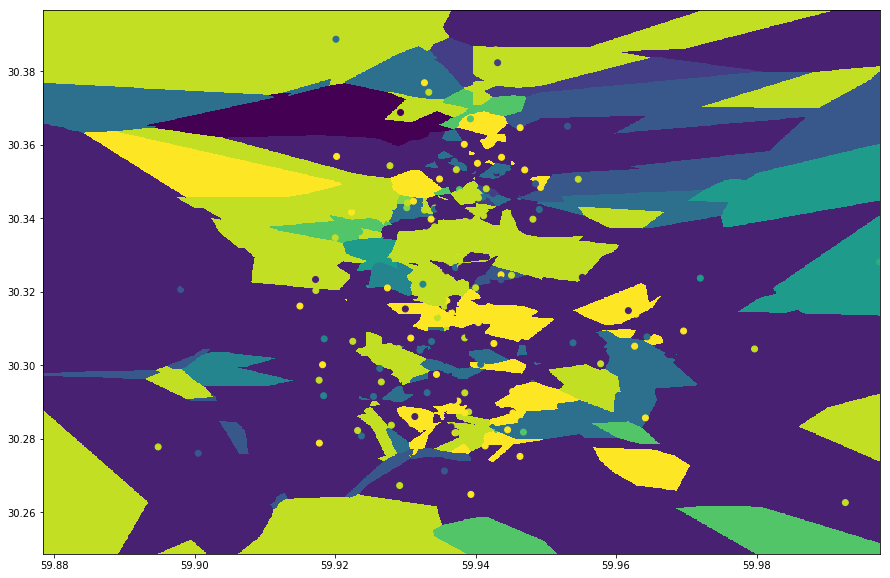

In [261]:
from matplotlib import pyplot as plt
%matplotlib inline


Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 10))
plt.pcolormesh(xx, yy, Z)


# Plot also the training points
plt.scatter(location_classified['coordinateX'], location_classified['coordinateY'], c=location_classified['class_digit'])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


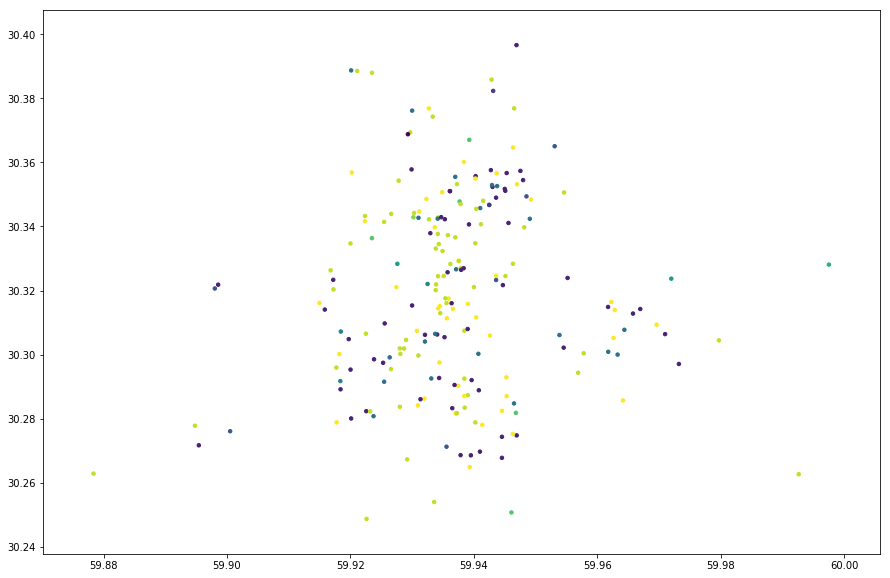

In [265]:
plt.figure(figsize=(15, 10))
plt.scatter(location_classified['coordinateX'], location_classified['coordinateY'], c=location_classified['class_digit'],s=12)

In [ ]:
location_classified[['coordinateX', 'coordinateY']], location_classified['class_digit']

In [216]:
location_classified

,Unnamed: 0,coordinateX,coordinateY,0,1,2,3,4,5,6,...,911,912,913,914,915,916,917,918,class,class_digit
0,0,59.945277,30.292889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,художники,8
1,3,59.945617,30.341084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,художники,8
2,4,59.945319,30.287032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,танцы,7
3,5,59.941371,30.278067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,архитектура,0
4,8,59.935800,30.337293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,танцы,7
5,14,59.935308,30.342243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,певцы,6
6,17,59.934190,30.342782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,музыка,4
7,28,59.926584,30.295467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,танцы,7
8,32,59.921101,30.388524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,литература,3
9,34,59.936607,30.314260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,литература,3


In [285]:
pd.unique(data.constrac)

array(['1778', '05.04.1937', '', '1853', '27.04.1887', '16.10.1745',
       '28.10.1751', '30.10.1775', '174?', '18.03.1844', '01.12.1729',
       '28.02.1909', '1773', '05.08.1761', '11.06.1889', '14.10.1880',
       '10.10.1870', '28.11.1821', '06.04.1860', '17 (28) октября 1759',
       '10.12.1798', '21.03.1843', '1729', '26.10.1794', '04.08.1769',
       '26.09.1692', '20.09.1744', '03.05.1774', '1747', '24.03.1782',
       None, '15 июня 1864 года', '20 сентября (1 октября) 1791 года',
       '12 (23) декабря 1777 года', '17.04.1818 ',
       '26 февраля (10 марта) 1845 года', '13 мая 1221 года',
       '14 (26) января 1849 года', '18 (28) февраля 1690 года ',
       '28.01.1693', '7 января 1718 года', '4 марта 1954 года',
       '27 ноября (7 декабря) 1661 года', '15 (27) ноября 1840 года',
       '23 сентября (4 октября) 1769 года', '10 сентября 1872 года',
       '11 (23) июня 1889 года', '13 ноября 1945 года',
       '3 (15) января 1873 года', '20 ноября (2 декабря) 1897 года

In [290]:
len(data.constructionDate)

879

In [293]:
data.dropna(subset=['constructionDate']).shape

(879, 10)

In [296]:
data[data['constructionDate'] != ''].shape

(860, 10)

In [294]:
data.constructionDate

0                      1842
1                      1910
2                      1835
3                          
4                      1799
5                      1830
6                      1841
7                      1829
8                      1753
9                      1819
10                     1879
11                         
12                     1838
13                     1861
14                     1870
15                         
16                     1822
17                         
18                     1906
19                     1873
20                     1834
21                     1905
22                     1799
23                     1833
24                     1760
25                     1881
26                     1880
27                1843-1851
28                     1871
29                     1803
               ...         
849             1731 - 1734
850               1720—1723
851         1781-1782, 1859
852             1786 - 1790
853               17

In [298]:
a = ''
a[:2]

''

In [302]:
def func(x):
    try:
        y = int(x[:2])+1
    except:
        y = x[:2] 
        
    return y

data.constructionDate.apply(lambda x: func(x))

0      19
1      20
2      19
3        
4      18
5      19
6      19
7      19
8      18
9      19
10     19
11       
12     19
13     19
14     19
15       
16     19
17       
18     20
19     19
20     19
21     20
22     18
23     19
24     18
25     19
26     19
27     19
28     19
29     19
       ..
849    18
850    18
851    18
852    18
853    18
854    19
855    20
856    20
857    20
858    19
859    19
860    19
861    19
862    19
863    19
864    19
865    18
866    20
867    19
868    20
869    19
870    20
871    19
872    18
873    19
874    19
875    18
876    19
877    18
878    19
Name: constructionDate, Length: 879, dtype: object